In [1]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from pre_process import PreProcess

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import pandas as pd

data = pd.read_csv('./spam.csv')
print(data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [3]:
print(type(data["Message"]))
data["Message"] = PreProcess.preProcess(data["Message"])
print(data["Message"][0])

<class 'pandas.core.series.Series'>
go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   


In [4]:
print(data["Message"][0])
print(data["Message"].size)
for i in range(0, data["Message"].size):
  data["Message"][i] = PreProcess.standardize(data["Message"][i])
print(data["Message"][0])

go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   
5572
go jurong point crazy available bugis n great world la e buffet cine get amore wat


In [5]:
data["Label"] = 0
for i in range(0, data["Category"].size):
  data["Label"][i] = PreProcess.transformLabel(data["Category"][i])

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17332\2858425811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Label"][i] = PreProcess.transformLabel(data["Category"][i])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17332\2858425811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Label"][i] = PreProcess.transformLabel(data["Category"][i])
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17332\2858425811.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [6]:
X = data["Message"]
Y = data["Label"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=0)

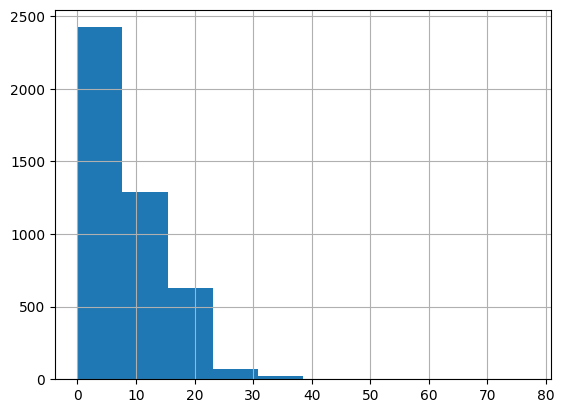

In [7]:
import matplotlib.pyplot as plt
sent = list(X_train)
sentences = [row.split() for row in sent]
seq_len = [len(i) for i in sentences]
pd.Series(seq_len).hist(bins = 10)
plt.show()

In [8]:
dim = 150
kernel_size = 3
max_length = 40

In [9]:
from gensim.models import Word2Vec
sent = list(X_train)
sentences = [row.split() for row in sent]
print(sentences)
w2v_model = Word2Vec(sentences, vector_size=dim, window=5, min_count=1, workers=4)
w2v_model.save("word2vec.model")

[['good', 'movie', 'ok', 'leave', 'hourish'], ['free', 'give', 'otherwise', 'nalla', 'adi', 'entey', 'nattil', 'kittum'], ['emigrate', 'something', 'ok', 'maybe', 'bite', 'hopeful'], ['get', 'home', 'babe', 'still', 'awake'], ['kay', 'since', 'already'], ['workin', 'get', 'job'], ['say', 'matter', 'mind', 'say', 'matter'], ['oh', 'yeah', 'diet', 'fly', 'window'], ['sorry', 'get', 'thing', 'may', 'pub', 'late'], ['ill', 'call', 'even', 'ill', 'idea'], ['dear', 'reache', 'room'], ['get', 'look', 'scrumptious', 'daddy', 'want', 'eat', 'night', 'long'], ['badrith', 'chennai', 'surely', 'pick', 'u', 'competition'], ['da', 'car', 'park'], ['okay', 'soon', 'best'], ['yar', 'else', 'thk', 'sort', 'funny', 'thing'], ['yup', 'izzit', 'still', 'rain', 'heavily', 'co', 'e', 'mrt', 'c', 'outside'], ['way', 'ur', 'home'], ['ok', 'pop', 'ask', 'bout', 'something', 'say', 'around', 'tonght', 'wen', 'girl', 'come'], ['talk', 'g', 'x'], ['cool', 'tyler', 'take', 'gonna', 'buy', 'drop', 'place', 'late', 

In [10]:
def trans_text_word2vec(sentence, vocab):
  feature_vector = []
  for i in range(len(sentence) - 1):
    word = sentence[i]
    if vocab[word] is not None:
      feature_vector.append(vocab[word])
  return feature_vector

In [11]:
from keras.preprocessing.sequence import pad_sequences

vocab = w2v_model.wv

input_cnn = []
for i in range(len(sentences) - 1):
  input_cnn.append(trans_text_word2vec(sentences[i], vocab))

print(input_cnn.shape)


[array([ 1.63471073e-01, -1.25688210e-01, -2.58377910e-01, -5.86672835e-02,
        8.99882093e-02, -1.61818996e-01,  6.44226139e-03,  5.10024309e-01,
       -7.15728775e-02,  1.99495286e-01,  1.01702444e-01, -1.04826100e-01,
       -3.17165703e-01,  3.10081333e-01, -3.69511366e-01, -1.81928307e-01,
        2.62317836e-01, -2.71050949e-02,  3.56967933e-03,  4.14085656e-01,
       -3.24721158e-01, -3.46891619e-02,  4.42628533e-01,  3.16943675e-01,
        1.34078428e-01, -5.37358448e-02, -4.91865784e-01, -3.91011894e-01,
       -1.50345936e-01, -3.23721528e-01, -1.01441696e-01,  9.86505896e-02,
       -1.80094838e-01, -2.41875246e-01, -2.75180191e-01,  9.60597917e-02,
        5.91259241e-01,  5.69956675e-02,  1.14003800e-01, -2.87997752e-01,
       -1.73443913e-01,  4.00013849e-02, -3.88685197e-01, -2.18050137e-01,
        3.16562176e-01,  1.95151418e-02,  7.78965130e-02, -1.44908562e-01,
        1.95164680e-01,  2.52270907e-01, -2.13573664e-01,  1.74575895e-01,
       -2.29417995e-01,

In [12]:
input_cnn = pad_sequences(input_cnn, maxlen=max_length, padding='post')
print(input_cnn.shape)
print(type(input_cnn[0]))

(4456, 40, 150)
<class 'numpy.ndarray'>


In [13]:
import numpy as np

vocab_size = len(w2v_model.wv.index_to_key)
embedding_matrix = np.random.randn(vocab_size + 1, dim) * 0.01
i = 0
for word in w2v_model.wv.index_to_key:
    embedding_vector = vocab[word]
    embedding_matrix[i] = embedding_vector
    i += 1

print(embedding_matrix.shape)
print(vocab_size)

(5737, 150)
5736


In [18]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding, Flatten
from keras.layers import Conv1D, GlobalMaxPooling1D

print(input_cnn.shape)
model = Sequential()
model.add(Embedding(vocab_size + 1, dim, weights=[embedding_matrix],
                    input_length=max_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Adjust NUM_CLASSES based on your task

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

(4456, 40, 150)


In [19]:
model.fit(input_cnn, Y_train, batch_size=128, epochs=8, validation_split=0.1, shuffle=True)
print(model.summary())

Epoch 1/8


ValueError: in user code:

    File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 235, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "global_max_pooling1d_1" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 40, 146, 128)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 40, 150), dtype=int32)
      • training=True
      • mask=None


In [ ]:
print(w2v_model.wv.index_to_key)

['u', 'get', 'call', 'go', 'ur', 'gt', 'lt', 'come', 'ok', 'day', 'know', 'good', 'free', 'send', 'time', 'like', 'love', 'want', 'late', 'say', 'think', 'text', 'tell', 'need', 'take', 'see', 'make', 'p', 'r', 'one', 'today', 'stop', 'txt', 'reply', 'k', 'lor', 'home', 'n', 'c', 'da', 'sorry', 'back', 'mobile', 'dont', 'still', 'meet', 'hi', 'miss', 'new', 'week', 'please', 'dear', 'co', 'phone', 'work', 'ask', 'msg', 'give', 'night', 'pls', 'well', 'much', 'great', 'message', 'min', 'claim', 'leave', 'wait', 'try', 'hope', 'happy', 'b', 'friend', 'thank', 'hey', 'oh', 'thing', 'number', 'www', 'wat', 'way', 'find', 'prize', 'feel', 'cash', 'yes', 'let', 'amp', 'im', 'win', 'tone', 'right', 'already', 'yeah', 'care', 'pick', 'life', 'even', 'babe', 'e', 'tomorrow', 'sleep', 'keep', 'really', 'uk', 'lol', 'service', 'morning', 'buy', 'smile', 'anything', 'would', 'year', 'start', 'com', 'last', 'something', 'contact', 'sure', 'also', 'nokia', 'use', 'first', 'look', 'gud', 'watch', 'en

In [ ]:
print(w2v_model.wv)
print(w2v_model.wv.most_similar(positive=["good"]))

KeyedVectors<vector_size=150, 5736 keys>
[('day', 0.99980229139328), ('get', 0.9997962713241577), ('go', 0.999786913394928), ('u', 0.9997814297676086), ('give', 0.9997771978378296), ('n', 0.9997761249542236), ('make', 0.9997702240943909), ('need', 0.9997657537460327), ('say', 0.9997653961181641), ('ur', 0.999754786491394)]
